In [1]:
import numpy as np
from gwpopulation.models.mass import BrokenPowerLawPeakSmoothedMassDistribution
from gwpopulation.models.redshift import MadauDickinsonRedshift

###

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.grid'] = False
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['legend.handlelength'] = 3
mpl.rcParams['legend.fontsize'] = 22

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import seaborn as sns
sea = sns.color_palette("Set2")
sead = sns.color_palette("dark")

###

/home/arianna.renzini/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
dfile = np.load('omegagw_0_BPL_1000000_samples.npz', allow_pickle=True)
omegagw = dfile['omega_gw']
frequencies = dfile['freqs']

import json
with open('samples/samples_100000_samples_0_BPL_mass_model.json') as f:
    data = json.load(f)
    Lambda_0 = data['Lambda_0']

In [20]:
Lambda_0

{'alpha_1': 2,
 'alpha_2': 1.4,
 'beta': 1,
 'break_fraction': 0.4,
 'mmax': 100,
 'mmin': 4,
 'lam': 0,
 'mpp': 33,
 'sigpp': 5,
 'delta_m': 4.5,
 'gamma': 2.7,
 'kappa': 5.6,
 'z_peak': 1.9,
 'rate': 16}

In [9]:
params_mass = {'alpha_1': float(Lambda_0['alpha_1']), 
               'alpha_2': float(Lambda_0['alpha_2']), 
               'break_fraction': float(Lambda_0['break_fraction']), 
               'mmax': float(Lambda_0['mmax']), 
               'mmin': float(Lambda_0['mmin']), 
               'lam': float(Lambda_0['lam']), 
               'mpp': float(Lambda_0['mpp']), 
               'sigpp': float(Lambda_0['sigpp'])}
params_z = {'gamma': Lambda_0['gamma'], 
            'kappa': Lambda_0['kappa'], 
            'z_peak': Lambda_0['z_peak'], 
            'rate': Lambda_0['rate']}

mass_obj = BrokenPowerLawPeakSmoothedMassDistribution()
redshift_obj = MadauDickinsonRedshift(z_max=10)

mass = np.arange(1, 100, 0.1)
dataset_M={"mass_1": mass}

redshift = np.arange(0, 10, 0.1)
dataset_R={"redshift": redshift}

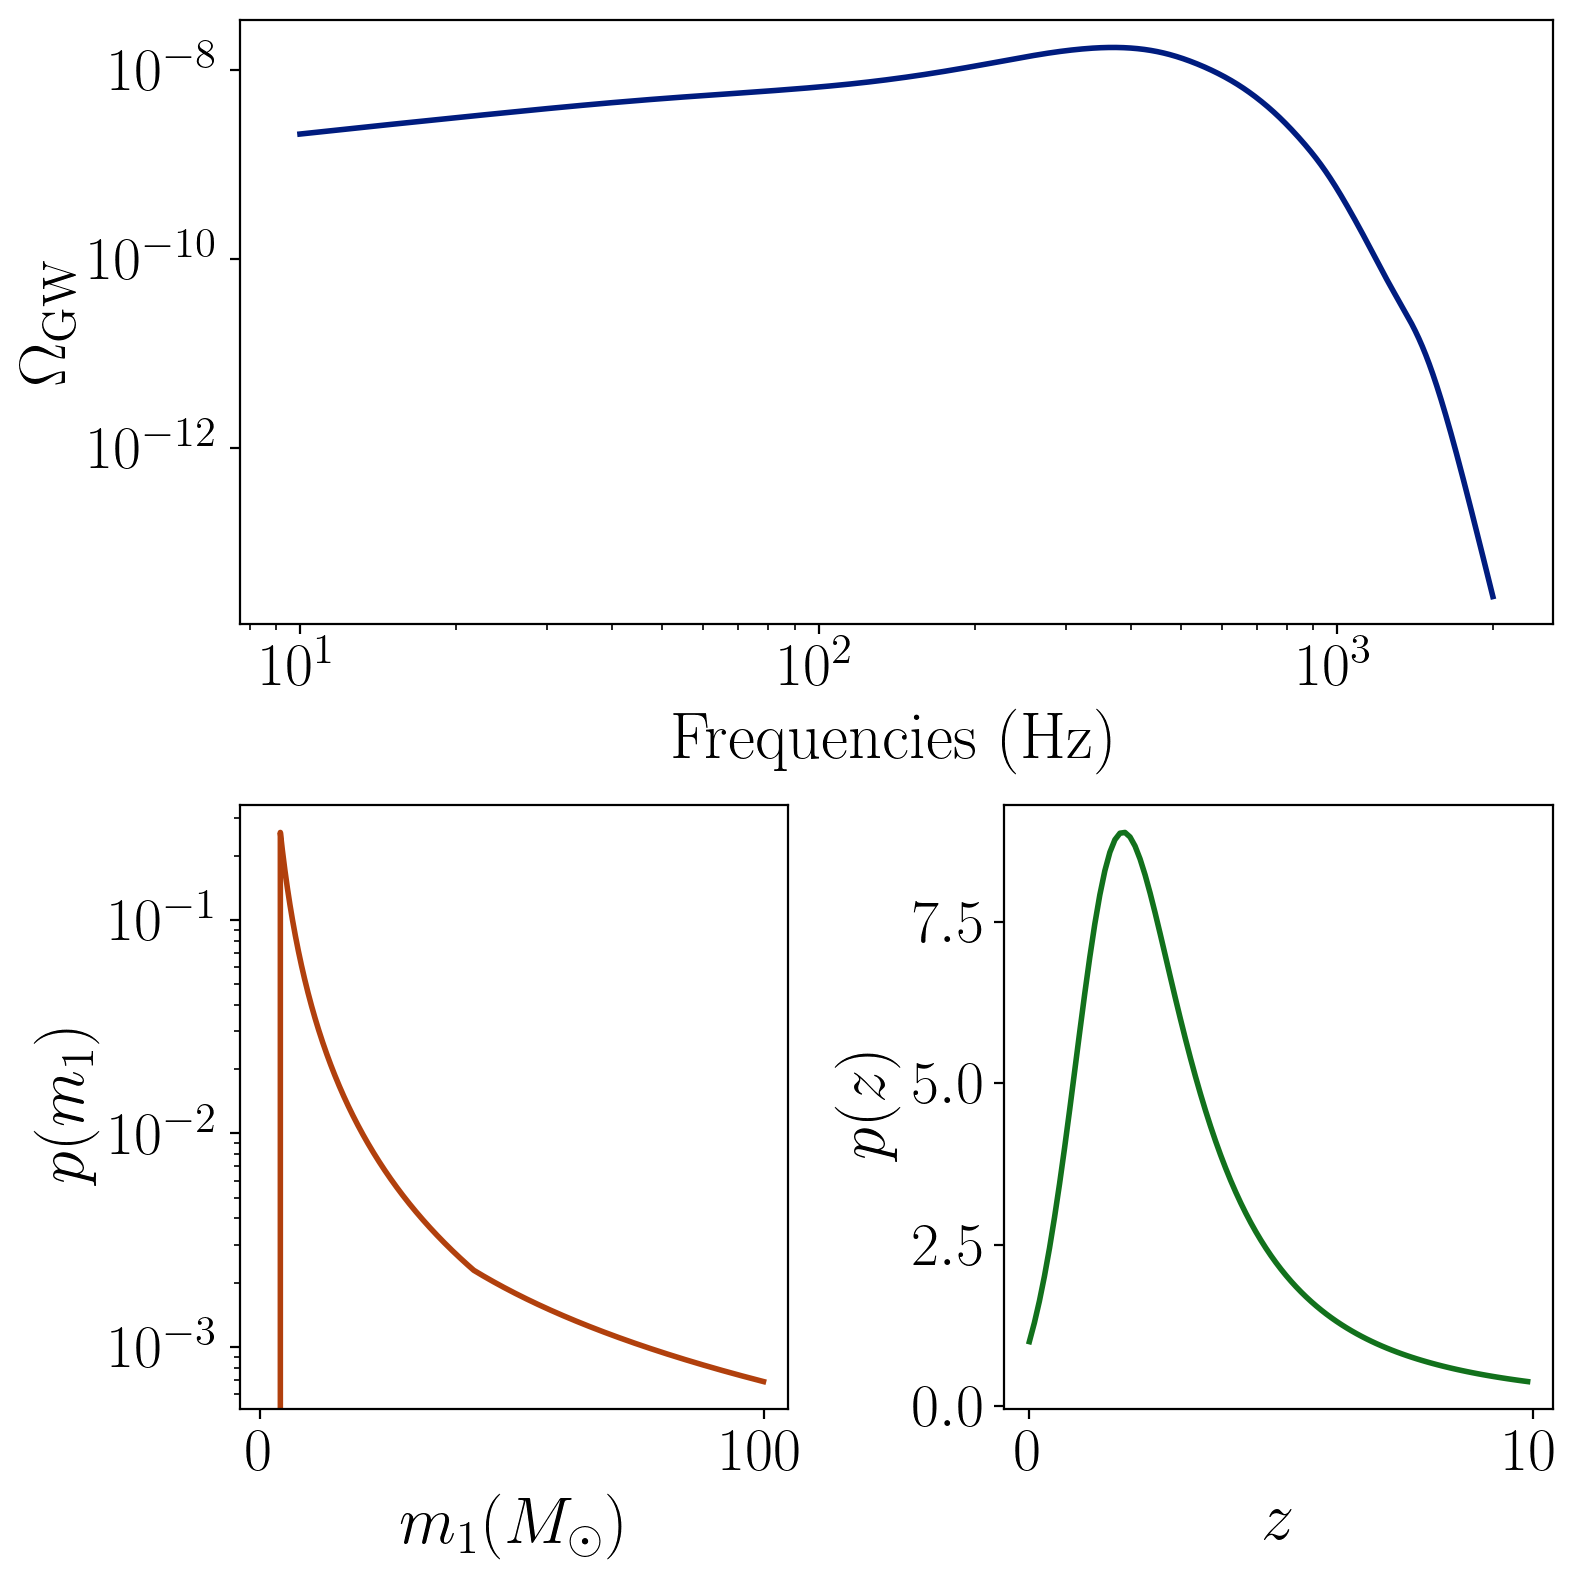

In [19]:
fig, ax = plt.subplot_mosaic( [["omega", "omega"],["Rm", "Rz"]], figsize=(8, 8)) #plt.subplots(1, 3, figsize=(20, 5))

ax['omega'].plot(frequencies, omegagw, color = sead[0])
ax['omega'].set_xscale('log')
ax['omega'].set_yscale('log')
ax['omega'].set_xlabel('Frequencies (Hz)')
ax['omega'].set_ylabel(r'$\Omega_{\rm GW}$')

ax['Rm'].plot(mass, mass_obj.p_m1(dataset_M, **params_mass), color = sead[1])
ax['Rm'].set_yscale('log')
ax['Rm'].set_xlabel(r'$m_1 (M_\odot)$')
ax['Rm'].set_ylabel(r'$p(m_1)$')

ax['Rz'].plot(redshift, redshift_obj.psi_of_z(redshift, **params_z), color = sead[2])
ax['Rz'].set_xlabel(r'$z$')
ax['Rz'].set_ylabel(r'$p(z)$')

plt.tight_layout()